# Assignment: Decision Tree - Fraud Check data

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [58]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [59]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [60]:
print(df.apply(lambda col: col.unique()))

Undergrad                                                  [NO, YES]
Marital.Status                           [Single, Divorced, Married]
Taxable.Income     [68833, 33700, 36925, 50190, 81002, 33329, 833...
City.Population    [50047, 134075, 160205, 193264, 27533, 116382,...
Work.Experience    [10, 18, 30, 15, 28, 0, 8, 3, 12, 4, 19, 6, 14...
Urban                                                      [YES, NO]
dtype: object


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [62]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


<AxesSubplot:>

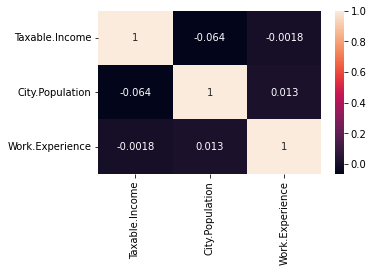

In [63]:
plt.figure(figsize=(5,3))
sns.heatmap(df.corr(),annot=True)

In [64]:
def filter(x):
    if x <= 30000:
        return 'Risky'
    if x > 30000:
        return 'Good'
df['Tax_Income'] = df['Taxable.Income'].apply(filter)

In [65]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_Income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [66]:
df = df.drop('Taxable.Income', axis = 1)
df.dropna(inplace = True)

In [67]:
df['Tax_Income'] = df['Tax_Income'].replace({"Good":1,"Risky":0})

In [68]:
df.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Tax_Income
0,NO,Single,50047,10,YES,1
1,YES,Divorced,134075,18,YES,1
2,NO,Married,160205,30,YES,1
3,YES,Single,193264,15,YES,1
4,NO,Married,27533,28,NO,1


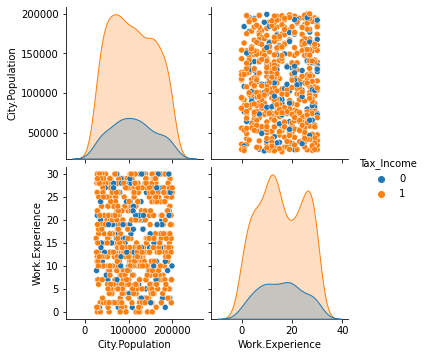

In [69]:
sns.pairplot(data=df, hue = 'Tax_Income')

In [70]:
df1 = pd.get_dummies(df)
df1.head()

,City.Population,Work.Experience,Tax_Income,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,1,0,0,0,1,0,1
1,134075,18,1,0,1,1,0,0,0,1
2,160205,30,1,1,0,0,1,0,0,1
3,193264,15,1,0,1,0,0,1,0,1
4,27533,28,1,1,0,0,1,0,1,0


In [71]:
df1

,City.Population,Work.Experience,Tax_Income,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,1,0,0,0,1,0,1
1,134075,18,1,0,1,1,0,0,0,1
2,160205,30,1,1,0,0,1,0,0,1
3,193264,15,1,0,1,0,0,1,0,1
4,27533,28,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,39492,7,1,0,1,1,0,0,0,1
596,55369,2,1,0,1,1,0,0,0,1
597,154058,0,1,1,0,1,0,0,0,1
598,180083,17,1,0,1,0,1,0,1,0


# Featutes & Target


In [72]:
X =  df1.drop('Tax_Income',axis=1).values
y = df1.Tax_Income

# Feature scaling (Not required)

In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)

# Train Test Spliting

In [74]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=0)

# Model Creation

In [75]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

# Model Validation (Confusion Matrix)

In [76]:
y_pred = model.predict(X_test)

In [77]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [78]:
test_acc = accuracy_score(y_test,y_pred)
test_acc

0.5933333333333334

In [79]:
y_pred1 = model.predict(X_train)
train_acc = accuracy_score(y_train,y_pred1)
train_acc

1.0

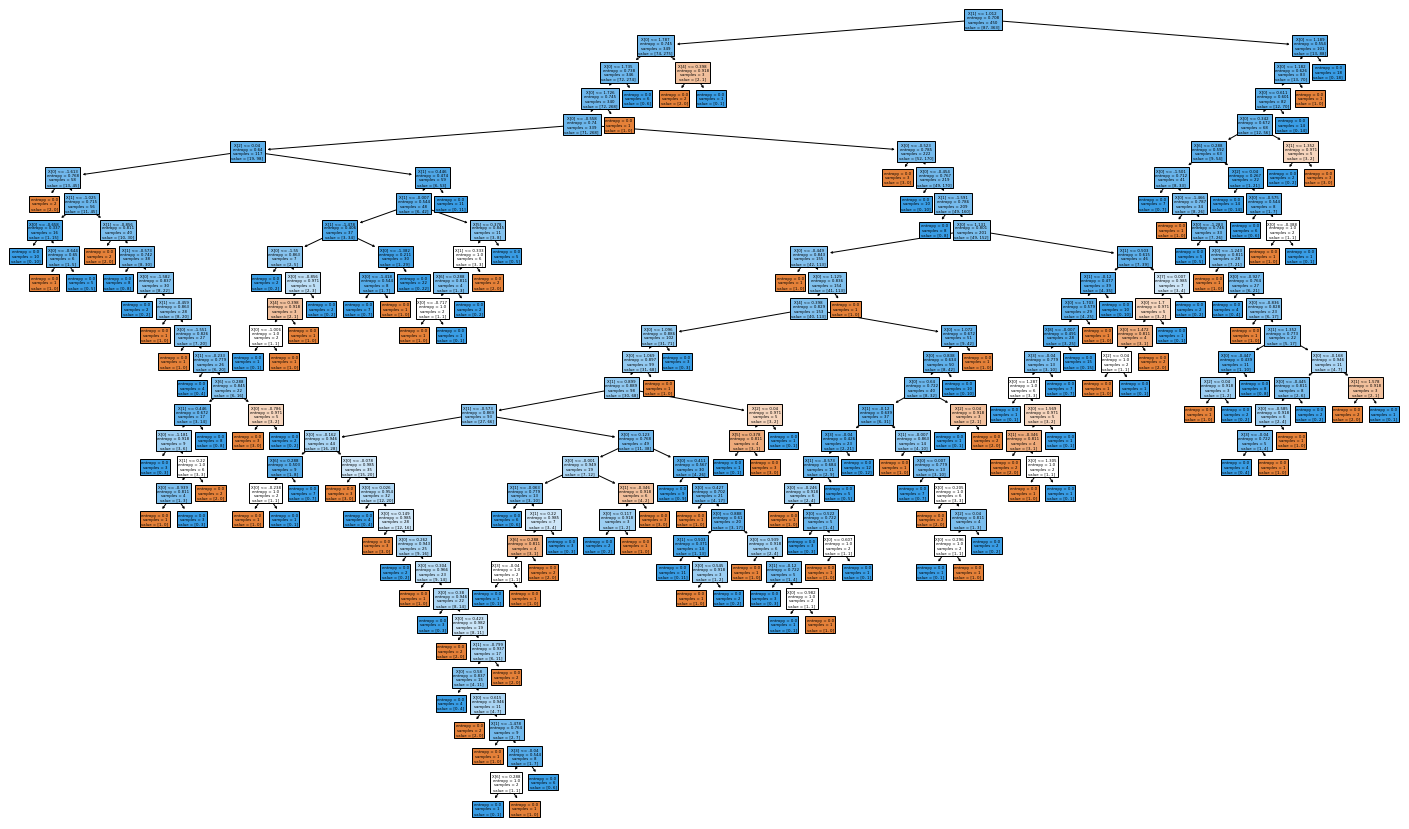

In [80]:
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(model,filled=True)

plt.show()

# Overfitting issues

In [81]:
# ccp_alpha, max_depth, criterion

In [82]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy",ccp_alpha=0.0)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [83]:
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impuritites = path.ccp_alphas, path.impurities

In [84]:
ccp_alphas

array([0.        , 0.00306099, 0.00360568, 0.00360568, 0.00360568,
       0.00365217, 0.00401071, 0.00401071, 0.00422252, 0.00422252,
       0.00434728, 0.00444444, 0.00444444, 0.004477  , 0.00455594,
       0.00480048, 0.00495336, 0.00506408, 0.00510859, 0.00516028,
       0.00521892, 0.00533164, 0.00533849, 0.00539417, 0.0055776 ,
       0.00562072, 0.0057246 , 0.00580674, 0.00593633, 0.00599627,
       0.00612197, 0.0069229 , 0.00700701, 0.00701492, 0.00791592])

In [85]:
clf = []
for i in ccp_alphas:
    test_model = DecisionTreeClassifier(criterion="entropy",ccp_alpha=i)
    test_model.fit(X_train,y_train)
    clf.append(test_model)
    

In [86]:
train_score = []
test_score = []
for mod in clf:
    train_score.append(mod.score(X_train,y_train))
    test_score.append(mod.score(X_test,y_test))

In [87]:
train_scores = [model.score(X_train,y_train) for model in clf]
test_scores = [model.score(X_test,y_test) for model in clf]

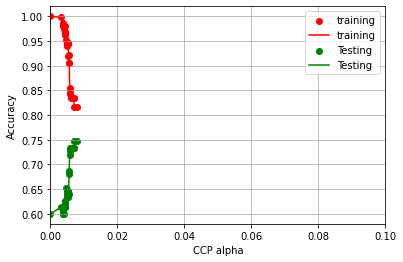

In [88]:
plt.scatter(ccp_alphas,train_score,label="training",color='red')
plt.plot(ccp_alphas,train_score,label="training",color='red')
plt.scatter(ccp_alphas,test_score,label="Testing",color="green")
plt.plot(ccp_alphas,test_score,label="Testing",color="green")
plt.legend()
plt.xlabel("CCP alpha")
plt.ylabel("Accuracy")
plt.grid()
plt.xlim(0,0.1)
plt.show()

In [97]:
from sklearn.tree import DecisionTreeClassifier
final_model = DecisionTreeClassifier(criterion="entropy",ccp_alpha=0.009)
final_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.009, criterion='entropy')

In [98]:
y_pred = final_model.predict(X_test)
test_acc = accuracy_score(y_test,y_pred)
test_acc

0.7533333333333333

In [99]:
y_pred1 = final_model.predict(X_train)
train_acc = accuracy_score(y_train,y_pred1)
train_acc

0.8066666666666666

# Model visualization

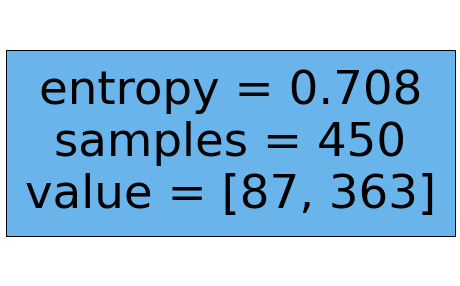

In [100]:
from sklearn import tree
plt.figure(figsize=(8,5))
tree.plot_tree(final_model,filled=True)

plt.show()